<a href="https://colab.research.google.com/github/AbhijeetDR/EDA-of-restaurants-throughtout-Pune-Zomato-/blob/main/DataWiz_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading csv file

In [ ]:
df = pd.read_csv("/content/sample_data/zomato_outlet_final.csv")

In [ ]:
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


In [ ]:
df.shape

(5433, 11)

# Info about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5433 non-null   object 
 1   rest_name         5433 non-null   object 
 2   rest_type         4336 non-null   object 
 3   loc               5433 non-null   object 
 4   dine_rating       4829 non-null   float64
 5   dine_reviews      4829 non-null   object 
 6   delivery_rating   2539 non-null   float64
 7   delivery_reviews  2539 non-null   object 
 8   cuisine           5433 non-null   object 
 9   cost              5433 non-null   object 
 10  liked             2603 non-null   object 
dtypes: float64(2), object(9)
memory usage: 467.0+ KB


# Dropping dulicate rows if any

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(5211, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5211 entries, 0 to 5432
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              5211 non-null   object 
 1   rest_name         5211 non-null   object 
 2   rest_type         4168 non-null   object 
 3   loc               5211 non-null   object 
 4   dine_rating       4621 non-null   float64
 5   dine_reviews      4621 non-null   object 
 6   delivery_rating   2410 non-null   float64
 7   delivery_reviews  2410 non-null   object 
 8   cuisine           5211 non-null   object 
 9   cost              5211 non-null   object 
 10  liked             2484 non-null   object 
dtypes: float64(2), object(9)
memory usage: 488.5+ KB


# Cleaning Begins

Cleaning rest_type

In [ ]:
df["rest_type"].value_counts()

Quick Bites                  1468
Casual Dining                 911
Bakery                        335
Dessert Parlor                308
Casual Dining,Bar             241
                             ... 
Dessert Parlor,Food Truck       1
Confectionery                   1
Irani Cafe,Quick Bites          1
Paan Shop                       1
Quick Bites,Casual Dining       1
Name: rest_type, Length: 66, dtype: int64

In [ ]:
rest_type = df["rest_type"].value_counts(ascending = False)
rest_type

Quick Bites                  1468
Casual Dining                 911
Bakery                        335
Dessert Parlor                308
Casual Dining,Bar             241
                             ... 
Dessert Parlor,Food Truck       1
Confectionery                   1
Irani Cafe,Quick Bites          1
Paan Shop                       1
Quick Bites,Casual Dining       1
Name: rest_type, Length: 66, dtype: int64

In [ ]:
rest_type_less_than_10 = rest_type[rest_type < 10]
rest_type_less_than_10

Dessert Parlor,Bakery           9
Café,Casual Dining              9
Dessert Parlor,Quick Bites      8
Dhaba                           8
Café,Bakery                     8
Beverage Shop,Quick Bites       7
Bakery,Café                     7
Fine Dining,Bar                 6
Casual Dining,Café              6
Dessert Parlor,Beverage Shop    5
Pub                             5
Quick Bites,Food Court          5
Irani Cafe                      5
Beverage Shop,Dessert Parlor    4
Quick Bites,Dessert Parlor      4
Quick Bites,Beverage Shop       4
Kiosk                           3
Lounge,Bar                      3
Bar,Pub                         3
Microbrewery                    3
Casual Dining,Lounge            3
Club                            3
Mess                            2
Dessert Parlor,Café             2
Food Court,Quick Bites          2
Café,Quick Bites                2
Quick Bites,Sweet Shop          2
Microbrewery,Pub                2
Bhojanalya                      2
Lounge,Pub    

In [ ]:
#making group("Others") of rest_type having count less than 10
def handle_rest_type(value):
  if value in rest_type_less_than_10:
    return "Others"
  else:
    return value

df["rest_type"] = df["rest_type"].apply(handle_rest_type)
df["rest_type"].value_counts()

Quick Bites               1468
Casual Dining              911
Bakery                     335
Dessert Parlor             308
Casual Dining,Bar          241
Café                       205
Others                     150
Bar,Casual Dining          126
Bakery,Dessert Parlor       70
Beverage Shop               57
Sweet Shop                  54
Food Court                  43
Bar                         37
Fine Dining                 31
Lounge                      29
Lounge,Casual Dining        29
Café,Dessert Parlor         22
Bakery,Quick Bites          19
Sweet Shop,Quick Bites      12
Pub,Casual Dining           11
Food Truck                  10
Name: rest_type, dtype: int64

In [ ]:
df["rest_type"].isna().sum()

1043

Filling null values

In [ ]:
df["rest_type"].fillna("Others", inplace = True)
df["rest_type"].isna().sum()

0

In [ ]:
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),NaN,NaN,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),NaN,NaN,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),NaN,NaN,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),NaN,NaN,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),NaN,NaN,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


Cleaning dine_rating and delilvery_rating

In [ ]:
df["dine_rating"].isna().sum()

590

Filling null value with mean of corresponding column

In [ ]:
df["dine_rating"].unique()
dine_rating_mean = round(df["dine_rating"].mean(), )
print(dine_rating_mean)
df["dine_rating"].fillna(dine_rating_mean, inplace = True)
df["dine_rating"].isna().sum()

df["delivery_rating"].isna().sum()
delivery_rating_mean = round(df["delivery_rating"].mean(), 1)
df["delivery_rating"].fillna(delivery_rating_mean, inplace = True)
df["delivery_rating"]

4


0       3.8
1       3.8
2       3.8
3       3.8
4       3.8
       ... 
5428    3.5
5429    3.8
5430    3.8
5431    3.1
5432    3.8
Name: delivery_rating, Length: 5211, dtype: float64

In [ ]:
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,(707 Reviews),3.8,NaN,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,(344 Reviews),3.8,NaN,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,(541 Reviews),3.8,NaN,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,(55 Reviews),3.8,NaN,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,(113 Reviews),3.8,NaN,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


Cleaning dine_review

In [ ]:
#replacing non alphabet char with empty string
df["dine_reviews"] = df["dine_reviews"].str.replace(r"\D", "").astype(float)

In [ ]:
#filling empty enteries with 0.0
df["dine_reviews"].isna().sum()
df["dine_reviews"].fillna(0.0, inplace = True)
df["dine_reviews"].isna().sum()

0

In [ ]:
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,delivery_reviews,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,707.0,3.8,NaN,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,344.0,3.8,NaN,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,3.8,NaN,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,55.0,3.8,NaN,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,113.0,3.8,NaN,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


In [ ]:
#Dropping delivery_reviews column
df["delivery_reviews"].isna().sum()
df.drop(columns=["delivery_reviews"], inplace = True)
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,707.0,3.8,"North Indian,Continental,Asian,Finger Food,","Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,344.0,3.8,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,3.8,"Mediterranean,Asian,North Indian,","Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,55.0,3.8,"Asian,European,North Indian,","Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,113.0,3.8,"Finger Food,Continental,","Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


# Cleaning Cuisine data

In [ ]:
#cuisines having count less than 5 will be replaced with Others
cuisines = df["cuisine"].value_counts()
cuisines_less_than_5 = cuisines[cuisines < 5]
cuisines_less_than_5

def handle_cuisines(value):
  if value in cuisines_less_than_5:
    return "Others"
  else:
    return value

df["cuisine"] = df["cuisine"].apply(handle_cuisines)
df["cuisine"].value_counts()

Others                                     1781
Desserts,Bakery,                            191
Bakery,                                     173
Desserts,Ice Cream,                         123
Chinese,North Indian,                       114
                                           ... 
Mughlai,Biryani,North Indian,                 5
Bengali,                                      5
Malwani,Mughlai,Chinese,North Indian,         5
Mughlai,Biryani,North Indian,Fast Food,       5
North Indian,Continental,                     5
Name: cuisine, Length: 160, dtype: int64

In [ ]:
df.head()

,link,rest_name,rest_type,loc,dine_rating,dine_reviews,delivery_rating,cuisine,cost,liked
0,https://www.zomato.com/pune/mix@36-the-westin-...,Mix@36 - The Westin\r\r\n ...,Lounge,"The Westin, Mundhwa",4.2,707.0,3.8,Others,"Rs. 4,300","Cocktails, Chaat, Beer"
1,https://www.zomato.com/pune/kangan-the-westin-...,Kangan - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.1,344.0,3.8,"North Indian,Mughlai,","Rs. 3,500","Biryani, Veg Platter, Dal Makhani, Butter Chic..."
2,https://www.zomato.com/pune/coriander-kitchen-...,Coriander Kitchen - Conrad Pune\r\r\n ...,Fine Dining,"Conrad Pune, Bund Garden Road",4.5,541.0,3.8,Others,"Rs. 3,200","Pasta, Panipuri, Waffles, Pizza, Salad, Chaat,..."
3,https://www.zomato.com/pune/the-market-the-wes...,The Market - The Westin\r\r\n ...,Fine Dining,"The Westin, Mundhwa",4.0,55.0,3.8,Others,"Rs. 3,200","Vanilla Ice Cream, Chaat, Sushi"
4,https://www.zomato.com/pune/vandaag-vivanta-pu...,Vandaag - Vivanta Pune\r\r\n ...,"Pub,Casual Dining","Vivanta Pune, Hinjewadi",3.9,113.0,3.8,Others,"Rs. 3,100","Cocktails, Beer, Peri Peri Chicken, Fish, Veg ..."


Cleaning Cost

In [ ]:
#replacing non-aplhabet char with empty string
df["cost"] = df["cost"].str.replace(r"\D", "").astype(float)
df["cost"]

0       4300.0
1       3500.0
2       3200.0
3       3200.0
4       3100.0
         ...  
5428     550.0
5429     800.0
5430     500.0
5431     250.0
5432     500.0
Name: cost, Length: 5211, dtype: float64

# Visualisation Begins

Which place has maximum no. of restaurants?

Text(0.5, 1.0, 'No. of Restaurants vs location')

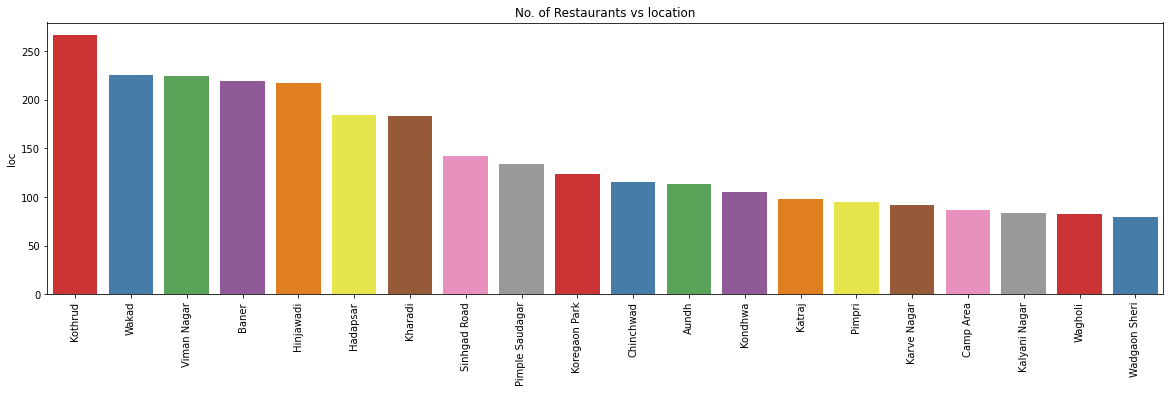

In [ ]:
plt.figure(figsize=(20,5))
location = df['loc'].value_counts()[:20]
barplt = sns.barplot(x = location.index, y = location, palette="Set1")
barplt.set_xticklabels(barplt.get_xticklabels(), rotation=90)
plt.title("No. of Restaurants vs location")

#Inference: Kothrud has max no of restaurants
# p.s. :If u wish to open restaurant, Kothrud isn't the right place :-)

Which food chain is having maximum no. of outlets?

Text(0.5, 0, 'No. of outlets')

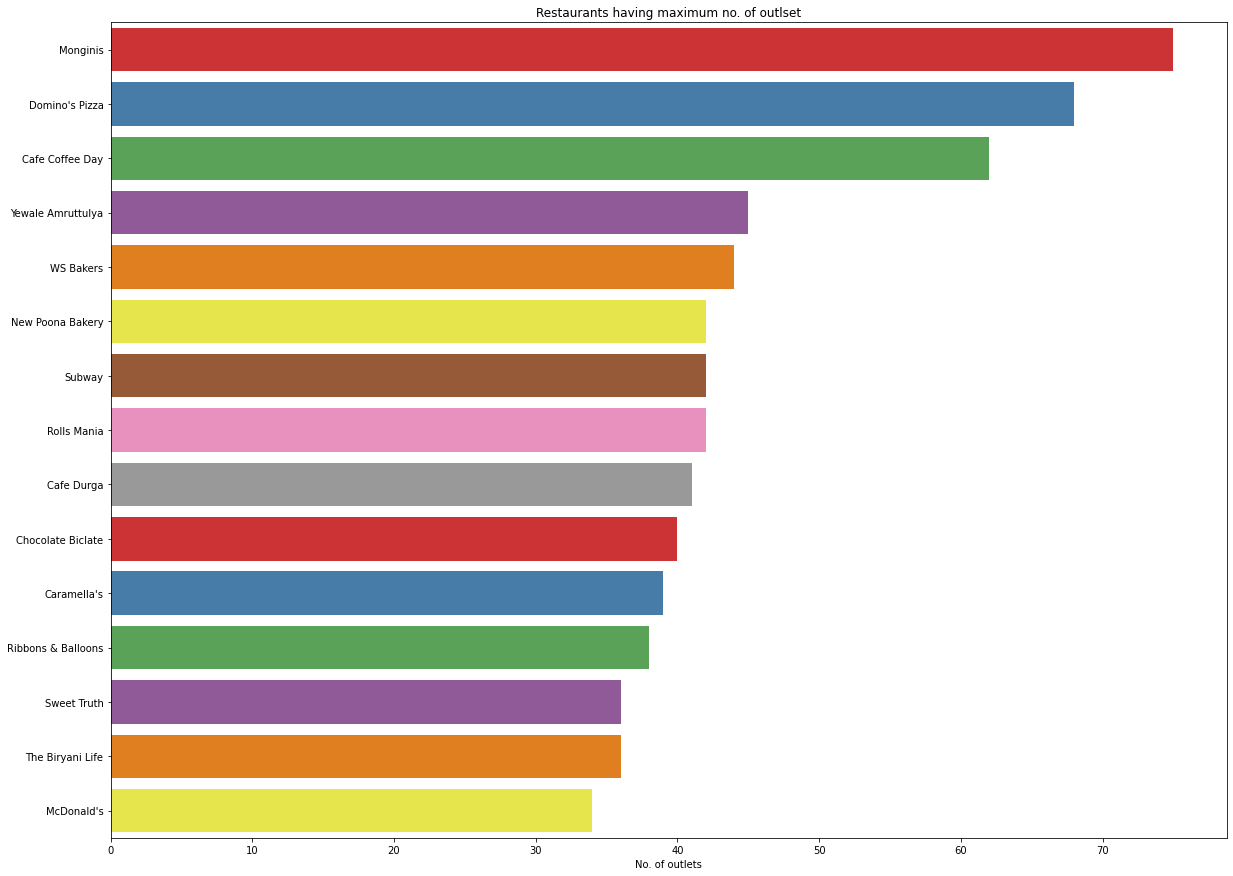

In [ ]:
plt.figure(figsize = (20,15))
outlet = df["rest_name"].value_counts()[0:15]
sns.barplot(x = outlet, y = outlet.index.str.rstrip(), palette= "Set1")
plt.title("Restaurants having maximum no. of outlset")
plt.xlabel("No. of outlets")
#monginis is having highest no. of outlets

Rest_type vs dine_rating

[Text(0, 0, 'Lounge'),
 Text(0, 0, 'Fine Dining'),
 Text(0, 0, 'Pub,Casual Dining'),
 Text(0, 0, 'Bar'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Casual Dining'),
 Text(0, 0, 'Bar,Casual Dining'),
 Text(0, 0, 'Lounge,Casual Dining'),
 Text(0, 0, 'Casual Dining,Bar'),
 Text(0, 0, 'Café,Dessert Parlor'),
 Text(0, 0, 'Café'),
 Text(0, 0, 'Bakery'),
 Text(0, 0, 'Quick Bites'),
 Text(0, 0, 'Food Court'),
 Text(0, 0, 'Bakery,Quick Bites'),
 Text(0, 0, 'Sweet Shop,Quick Bites'),
 Text(0, 0, 'Bakery,Dessert Parlor'),
 Text(0, 0, 'Dessert Parlor'),
 Text(0, 0, 'Sweet Shop'),
 Text(0, 0, 'Food Truck'),
 Text(0, 0, 'Beverage Shop')]

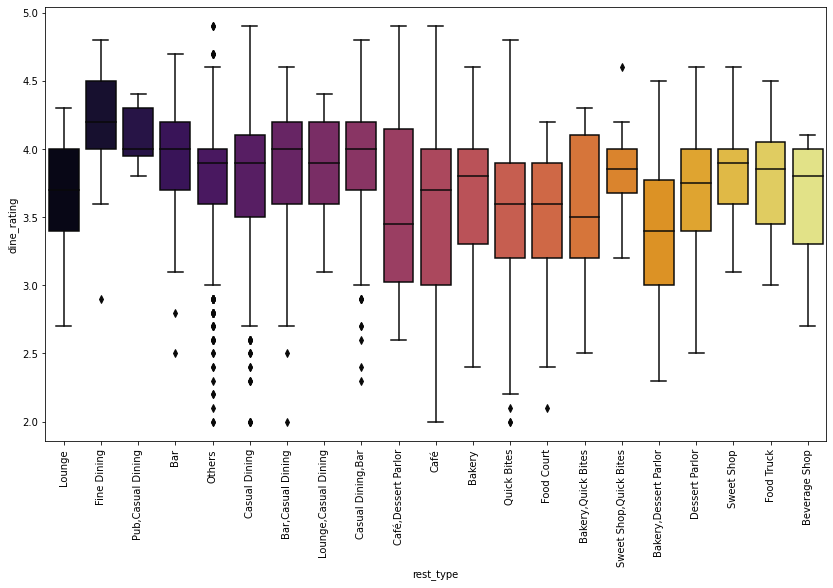

In [ ]:
plt.figure(figsize = (14,8))
boxplt = sns.boxplot(x = "rest_type", y = "dine_rating", data = df, palette="inferno")
boxplt.set_xticklabels(boxplt.get_xticklabels(), rotation = 90)
#que : Which rest_type has highest average dine_rating in Pune?
#ans : fine dinning

Text(0, 0.5, 'location')

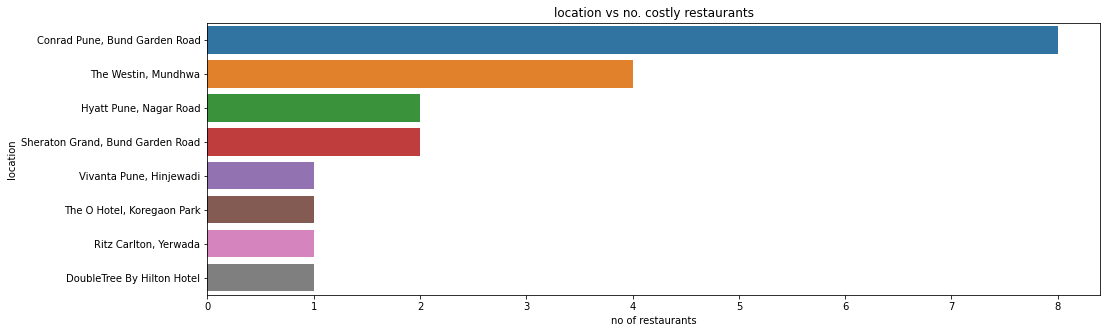

In [ ]:
plt.figure(figsize=(16,5))
costly = df[["loc", "cost"]].sort_values(by = "cost", ascending = False)[:20]
costly_loc = costly["loc"].value_counts()
sns.barplot(x = costly_loc, y = costly_loc.index)
plt.title("location vs no. costly restaurants")
plt.xlabel("no of restaurants")
plt.ylabel("location")